# Exploring Data Science Roles on Dice Job Site

### I web scrapped 220 data science roles on dice.com using an automated tool called Octoparse. 
#### The main goal of this research was to look into Data Sciece roles in the U.S. to explore and understand it market demand. Below are the features I scrapped and analyzed:
Job Title,
Company Name, 
City,
Number Of Days the job has been poseted,
Skills,
Employment Type,
Salary

In [473]:
#Import all the libraries I will need for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn import preprocessing
%matplotlib inline

## Importing Dataset

In [175]:
#read the data into variable df

df = pd.read_csv('dsdicejobs.csv')

In [176]:
#lets check the top 5 of our collected data

df.head()

,Job_Title,Company_Name,City,Number_Of_Days,Skills,Employment_Type,Salary
0,Data Scientist (Machine Learning) in Alpharett...,"Lorven Technologies, Inc.","Alpharetta, GA",9 minutes ago,"Machine Learning, Data Scientist","Full Time, 12 months",NaN
1,Senior Data Scientist - $160k - San Francisco,Jefferson Frank,"San Francisco, CA",58 minutes ago,Senior Data Scientist - $160k - San Francisco,Full Time,$ - $160000 per annum
2,Data Scientist - Remote - 130-160k+ - Global A...,Jefferson Frank,NaN,58 minutes ago,"Data Scientist, Date, Data Engineer, AWS, AWS ...",Full Time,$130 - $160 per annum
3,"Data Scientist/Arlington, VA/ Full Time/ $150K",Jefferson Frank,"Arlington, VA",58 minutes ago,"Data Scientist/Arlington, VA/ Full Time/ $150K",Full Time,$140000 - $150000 per annum
4,Data Scientist(Healthcare Exp a Plus!),CyberCoders,"Washington, DC",14 hours ago,NaN,NaN,NaN


In [177]:
#lets check the last 5 of our collected data

df.tail()

,Job_Title,Company_Name,City,Number_Of_Days,Skills,Employment_Type,Salary
214,Principal Data Scientist,GEICO,"Chevy Chase, MD",6 hours ago,NaN,NaN,NaN
215,Data Scientist,Virtusa,"Pleasanton, CA",6 days ago,"Tensorflow, Python, ML","Contract W2, 12 Years",$80 - $90
216,Senior Data Scientist,Jobot,"Pasadena, CA",3 hours ago,NaN,NaN,NaN
217,Data Scientist,Bloomberg,"Princeton, NJ",3 hours ago,"Systems, Python",Full Time,NaN
218,Data Scientist,Equifax,Melbourne,6 hours ago,NaN,NaN,NaN


In [584]:
#lets check the shape of our data by identifying the number of roles and columns

df.shape

(219, 7)

### lets check the number of missing values

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

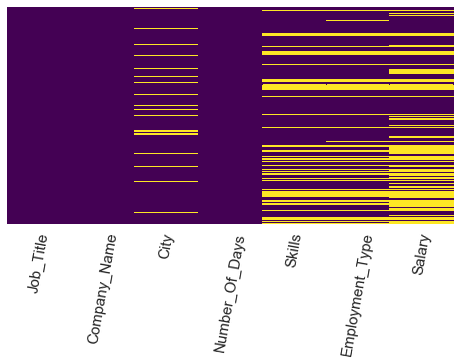

In [551]:

plt.figure(figsize=(8,4))
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation=80,fontsize=15)

In [180]:
df.isna().sum().sort_values(ascending=False)

Salary             91
Employment_Type    56
Skills             54
City               19
Number_Of_Days      0
Company_Name        0
Job_Title           0
dtype: int64

In [590]:
missingdata = df.isnull().sum()/df.isnull().count().sort_values()
print(missingdata)
print('based on the above info, we can tell that salary is missing close to about 50% of the data')

Job_Title          0.000000
Company_Name       0.000000
City               0.086758
Number_Of_Days     0.000000
Skills             0.246575
Employment_Type    0.255708
Salary             0.415525
dtype: float64
based on the above info, we can tell that salary is missing close to about 50% of the data


### now lets check the statistical summary of our data

In [182]:
df.describe()

,Job_Title,Company_Name,City,Number_Of_Days,Skills,Employment_Type,Salary
count,219,219,200,219,165,163,128
unique,110,149,104,30,155,42,49
top,Data Scientist,CyberCoders,"San Francisco, CA",3 hours ago,Full Time,Full Time,Depends on Experience
freq,77,11,12,29,4,80,69


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_Title        219 non-null    object
 1   Company_Name     219 non-null    object
 2   City             200 non-null    object
 3   Number_Of_Days   219 non-null    object
 4   Skills           165 non-null    object
 5   Employment_Type  163 non-null    object
 6   Salary           128 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


## Data Cleaning

In [66]:
#change index to start from 1 instead of 0
df.index = np.arange(1,len(df)+1)


In [185]:
#drop salary
df1 = df.drop('Salary', axis = 1)

#drop all null values in the dataset into a new variable df2
df2 = df1.dropna()

#describe the data and info
df2.describe()


C:\Users\Michael Osei\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [187]:
#check the text length of the skills into a new column called Lenght_Of_Skills
df2["Length_Of_Skills"] = df2["Skills"].apply(len)
df2.head()

C:\Users\Michael Osei\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Job_Title,Company_Name,City,Number_Of_Days,Skills,Employment_Type,Length_Of_Skills
0,Data Scientist (Machine Learning) in Alpharett...,"Lorven Technologies, Inc.","Alpharetta, GA",9 minutes ago,"Machine Learning, Data Scientist","Full Time, 12 months",32
1,Senior Data Scientist - $160k - San Francisco,Jefferson Frank,"San Francisco, CA",58 minutes ago,Senior Data Scientist - $160k - San Francisco,Full Time,45
3,"Data Scientist/Arlington, VA/ Full Time/ $150K",Jefferson Frank,"Arlington, VA",58 minutes ago,"Data Scientist/Arlington, VA/ Full Time/ $150K",Full Time,46
5,Data Scientist (Remote Position),VALiNTRYtechnology,"Jacksonville, FL",3 hours ago,"DATA SCIENTIST, DATA SCIENCE, R, PYTHON, SQL, ...",Full Time,104
6,Data Scientist / Database Architect,IT Resonance Inc.,"Springfield, VA",1 day ago,Data Scientist,Full Time,14


In [188]:
#split the city column into city and state

df2[['City','State']] = df2.City.str.split(",",  n = 1, expand=True)


C:\Users\Michael Osei\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [196]:
#drop all the null values
df2 = df2.dropna()

In [197]:
#now lets check if we having any missing values in our data
df2.isna().sum().sort_values(ascending=False)

State               0
Length_Of_Skills    0
Employment_Type     0
Skills              0
Number_Of_Days      0
City                0
Company_Name        0
Job_Title           0
dtype: int64

#### based on the info above, we can tell that we do not have any missing values in our data set. Now lets check the shape of our data

In [596]:
newdata = df2.shape
print(newdata)
print('After cleaning our data, we have a total of 143 roles and 8 columns to proceed with the market research')

(143, 8)
After cleaning our data, we have a total of 143 roles and 8 columns to proceed with the market research


In [199]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 217
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job_Title         143 non-null    object
 1   Company_Name      143 non-null    object
 2   City              143 non-null    object
 3   Number_Of_Days    143 non-null    object
 4   Skills            143 non-null    object
 5   Employment_Type   143 non-null    object
 6   Length_Of_Skills  143 non-null    int64 
 7   State             143 non-null    object
dtypes: int64(1), object(7)
memory usage: 10.1+ KB


In [211]:
#lets check the top 10 joby types in our dataset
df2['Employment_Type'].value_counts()[:10]

Full Time                                                              73
Contract W2, Contract Independent                                       6
Contract W2, Contract Independent, Contract Corp-To-Corp                6
Contract W2                                                             6
Contract W2, Contract Independent, Contract Corp-To-Corp, 12 Months     5
Contract W2, Contract Independent, 6 Months                             4
Contract W2, 6 Months                                                   3
Contract W2, 12 Months                                                  3
BASED ON EXPERIENCE                                                     3
Contract W2, Contract Corp-To-Corp, 12 Months                           3
Name: Employment_Type, dtype: int64

In [361]:
#lets convert all the object(string)
#astype() will cast each series to the dtype object (string) and then call the str() method on the converted series to get the string literally and call the function upper() on it. 
#Note that after this, the dtype of all columns changes to object.

df3 = df2.apply(lambda x: x.astype(str).str.lower())
df3.head()

,Job_Title,Company_Name,City,Number_Of_Days,Skills,Employment_Type,Length_Of_Skills,State
0,data scientist (machine learning) in alpharett...,"lorven technologies, inc.",alpharetta,9 minutes ago,"machine learning, data scientist","full time, 12 months",32,ga
1,senior data scientist - $160k - san francisco,jefferson frank,san francisco,58 minutes ago,senior data scientist - $160k - san francisco,full time,45,ca
3,"data scientist/arlington, va/ full time/ $150k",jefferson frank,arlington,58 minutes ago,"data scientist/arlington, va/ full time/ $150k",full time,46,va
5,data scientist (remote position),valintrytechnology,jacksonville,3 hours ago,"data scientist, data science, r, python, sql, ...",full time,104,fl
6,data scientist / database architect,it resonance inc.,springfield,1 day ago,data scientist,full time,14,va


### Exploratation

In [383]:
#lets convert the Employment Type column into a seperate DataFrame called newemptype which makes it easier to analyse

newemptype =pd.DataFrame(df3.Employment_Type.apply(pd.Series).stack().value_counts()).reset_index()
newemptype.columns=["Employment_Type","Count"]
newemptype.head()


,Employment_Type,Count
0,full time,73
1,"contract w2, contract independent, contract co...",6
2,"contract w2, contract independent",6
3,contract w2,6
4,"contract w2, contract independent, contract co...",5


In [384]:
#lets add a new column called Employemnt_Lenght that counts the lenght of characters in the Employment_Type
newemptype['Emp_Length'] = newemptype['Employment_Type'].apply(len)

In [388]:
newemptype.head()

,Employment_Type,Count,Emp_Length
0,full time,73,9
1,"contract w2, contract independent, contract co...",6,56
2,"contract w2, contract independent",6,33
3,contract w2,6,11
4,"contract w2, contract independent, contract co...",5,67


In [385]:
#lets check the maximum emp_length
newemptype['Emp_Length'].max()

121

In [389]:
#lets check the data in the max employment type
newemptype[newemptype['Emp_Length'] == 121 ]['Employment_Type'].iloc[0]

'full time, part time, contract w2, c2h w2, contract corp-to-corp, c2h independent, c2h corp-to-corp, contract independent'

## Data Visualization

In [327]:
import time
from operator import itemgetter

### Based on the count of employment types, we can tell that full time is the top type companies are looking for based on our data. Lets extract the top 6 employment types

In [390]:
#lets first find the top Employment Types for Data science in general
emptype={}
emptype['Full Time']=newemptype["Count"][newemptype['Employment_Type'].str.contains('full time', regex=True)].sum()
emptype['Contract W2']=newemptype["Count"][newemptype['Employment_Type'].str.contains('contract w2', regex=True)].sum()
emptype['Contract Independent']=newemptype["Count"][newemptype['Employment_Type'].str.contains('contract independent', regex=True)].sum()
emptype['C2H W2']=newemptype["Count"][newemptype['Employment_Type'].str.contains('c2h w2', regex=True)].sum()
emptype['C2H Independent']=newemptype["Count"][newemptype['Employment_Type'].str.contains('c2h independent', regex=True)].sum()
emptype['Part Time']=newemptype["Count"][newemptype['Employment_Type'].str.contains('part time', regex=True)].sum()

emptype=dict(sorted(emptype.items(), key=itemgetter(1),reverse=True))
emptype

{'Full Time': 79,
 'Contract W2': 59,
 'Contract Independent': 34,
 'C2H W2': 5,
 'C2H Independent': 2,
 'Part Time': 1}

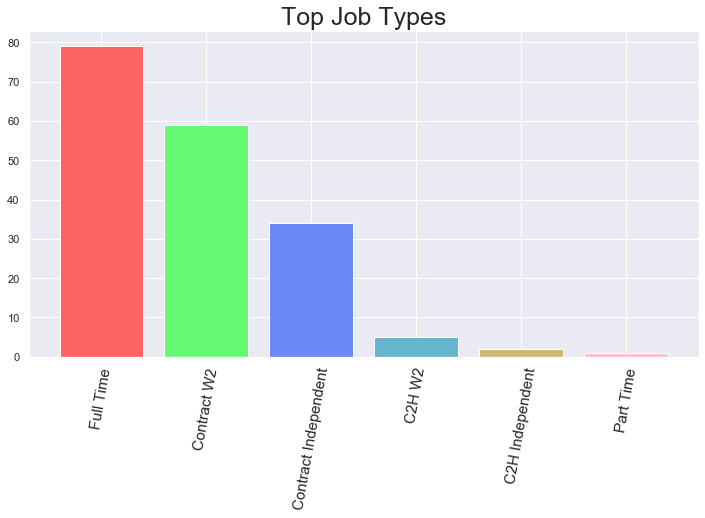

In [632]:
plt.figure(figsize=(12,6))
plt.bar(emptype.keys(),emptype.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Top Job Types",fontsize=25)
plt.show()

#### Observation:
 1. Most companies are looking for full time employees followed by contract w2 and contract independent
 2. We can observer that less data science roles are part time

In [392]:
#lets check the most skills in the skills column
df3['Skills'].value_counts()

data scientist                                                                                                       5
full time                                                                                                            3
contract w2, contract independent, 12+ mos                                                                           2
staff data scientist                                                                                                 2
data scientist, machine learning, ml, algorithms, data analysis, data mining, data science, r, statistical models    2
                                                                                                                    ..
aws, big data, data scientist, java, python, data warehouses, nosql                                                  1
ml, ai                                                                                                               1
data science, r, python, scikit-learn, pandas, n

In [377]:
# if you remember in our df2 dataset, we found out the most characters in Lenght_Of_Skills was 1095. 
#Now lets see the data in 1095 in the skills column to help find our top skills
df2[df2['Length_Of_Skills'] == 1095]['Skills'].iloc[0]

'Algorithms, Apache Spark, Big data, Deep learning, DS, TensorFlow, Machine learning, Python, PyTorch, data scientist, nlp'

In [621]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for pre processing
topskillscount =pd.DataFrame(df3.Skills.apply(pd.Series).stack().value_counts()).reset_index()
topskillscount.columns=["Top_Skills","Count"]
topskillscount.head()

,Top_Skills,Count
0,data scientist,5
1,full time,3
2,"contract w2, contract independent, 12+ mos",2
3,staff data scientist,2
4,"data scientist, machine learning, ml, algorith...",2


In [622]:
#lets check the lenght of each row 
topskillscount['Length_Skills'] = topskillscount['Top_Skills'].apply(len)
topskillscount.head()

,Top_Skills,Count,Length_Skills
0,data scientist,5,14
1,full time,3,9
2,"contract w2, contract independent, 12+ mos",2,42
3,staff data scientist,2,20
4,"data scientist, machine learning, ml, algorith...",2,113


In [399]:
#lets check the maximum number of characters in the Top_skills column
topskillscount.max()

Top_Skills       text analytics, nlp (natural language processi...
Count                                                            5
Lenght_Skills                                                 1095
dtype: object

In [401]:
#Since the lenght of the max skill is 1095, lets check the characters in the column to help with our analysis

topskillscount[topskillscount['Lenght_Skills'] == 1095 ]['Top_Skills'].iloc[0]

'a/b testing, advanced analytics, agile, algorithms, amazon redshift, amazon web services, apache hadoop, apache hive, apache spark, artificial intelligence, back office, business intelligence, c, can, clustering, communication skills, computer, computer science, cross-functional team, data analysis, data integrity, data mining, data modeling, data science, data validation, data visualization, database, decision trees, distributed computing, distribution, emc greenplum, evaluation, forecasting, framework, graphics design, implementation, information security, java, kanban, leadership, matlab, mba, mpp, machine learning, mapreduce, mathematics, microsoft excel, microsoft office, microsoft outlook, microsoft power bi, microsoft powerpoint, microsoft visio, microsoft windows azure, modeling, monitoring, neural networks, nosql, pci, predictive modelling, presentations, problem solving, process optimization, product development, python, qa, r, regression analysis, reporting, roadmaps, sql, 

### Top Data Science Skills

In [545]:
#With the help of the max and count of top Skills, we can identify the top characters for Data science
topskills={}
topskills['Machine Learning']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('machine', regex=True)].sum()
topskills['Data Mining']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('data mining', regex=True)].sum()
topskills['Statistical']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('stat', regex=True)].sum()
topskills['Data Analysis']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('data anal', regex=True)].sum()
topskills['Deep Learning']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('deep learn', regex=True)].sum()
topskills['Artificial Intelligence']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('art', regex=True)].sum()
topskills['A/B Testing']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('a/b', regex=True)].sum()
topskills['Data Validation']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('data val', regex=True)].sum()
topskills['Data Visualization']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('data vis', regex=True)].sum()

topskills=dict(sorted(topskills.items(), key=itemgetter(1),reverse=True))
topskills


{'Machine Learning': 63,
 'Statistical': 27,
 'Data Analysis': 17,
 'Data Mining': 15,
 'Deep Learning': 13,
 'Artificial Intelligence': 11,
 'Data Visualization': 6,
 'A/B Testing': 3,
 'Data Validation': 1}

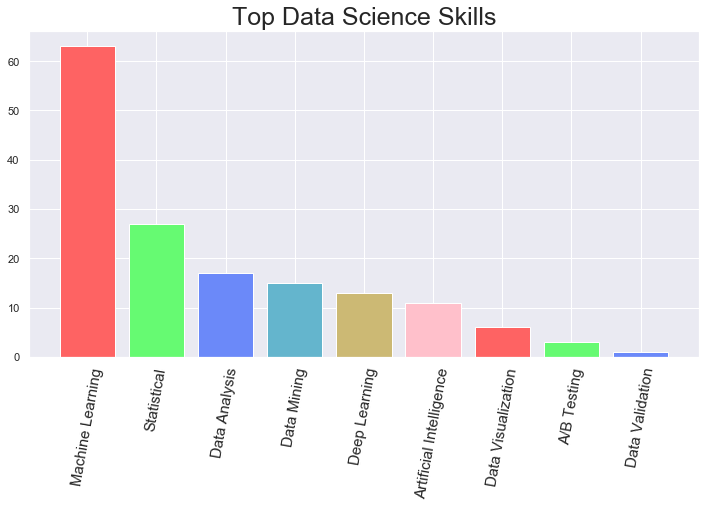

In [633]:
#lets find the top data science skills

plt.figure(figsize=(12,6))
plt.bar(topskills.keys(),topskills.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Top Data Science Skills",fontsize=25)
plt.show()

#### Observation:
 1. Most companies are looking for individuals that has skills in machine learning followed by statistics and data analysis
 2. We can observer that data validation was the lowerst skills companies are looking to hire

### Top Programming Language

In [420]:
#lets find the top Programming language for Data science in general

topskills={}
topskills['Python']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('python', regex=True)].sum()
topskills['SQL']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('sql', regex=True)].sum()
topskills['Excel']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('excel', regex=True)].sum()
topskills['Power BI']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('power bi', regex=True)].sum()
topskills['Java']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('java', regex=True)].sum()
#topskills['R']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('r$', regex=True)].sum()
topskills['Mat Lab']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('matlab', regex=True)].sum()
topskills['SAS']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('sas', regex=True)].sum()

Progtopskills=dict(sorted(topskills.items(), key=itemgetter(1),reverse=True))
Progtopskills

{'Python': 82,
 'SQL': 41,
 'Java': 22,
 'SAS': 12,
 'Power BI': 8,
 'Mat Lab': 6,
 'Excel': 5}

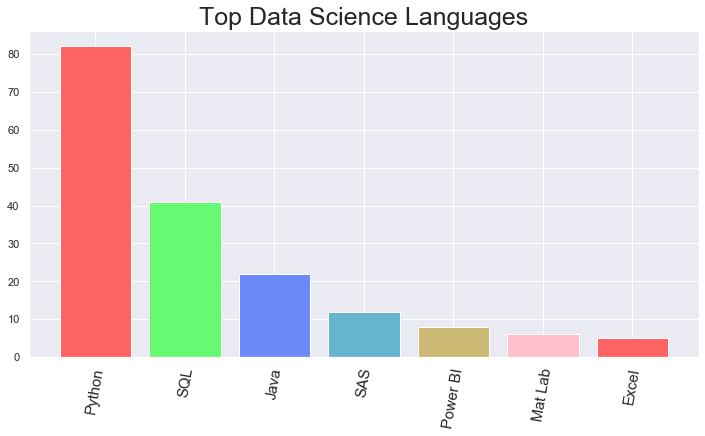

In [634]:
plt.figure(figsize=(12,6))
plt.bar(Progtopskills.keys(),Progtopskills.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Top Data Science Languages",fontsize=25)
plt.show()

#### Observation:
 1. Most companies are looking for individuals that has skills in Python followed by SQL and Java
 2. We can also observe that Excel was the lowerst skills companies are looking to hire

### Deep Learning

In [427]:
#lets first find the top Deep learning frameworks for Data science

frameworks={}
frameworks['TensorFlow']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('tensor', regex=True)].sum()
frameworks['Keras']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('keras', regex=True)].sum()
frameworks['PyTorch']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('pytor', regex=True)].sum()
frameworks['NLTK']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('nltk', regex=True)].sum()


topframeworks=dict(sorted(frameworks.items(), key=itemgetter(1),reverse=True))
topframeworks

{'TensorFlow': 11, 'PyTorch': 8, 'Keras': 2, 'NLTK': 2}

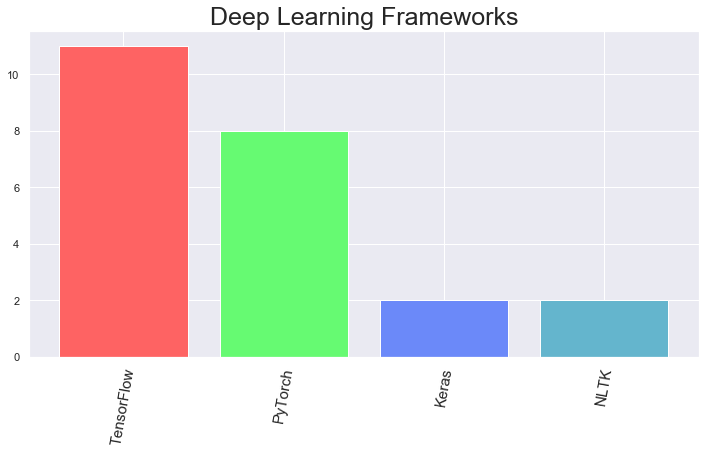

In [635]:
plt.figure(figsize=(12,6))
plt.bar(topframeworks.keys(),topframeworks.values(),color=["#FE6363","#66FA72","#6B89F9","c"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Deep Learning Frameworks",fontsize=25)
plt.show()

#### Observation:
 1. Looking at the above chart, we can tell that comapnies are more looking for individuals with TenserFlow skills followed by PyTorch and Keras
 2. We can also observe that NLTK is the least skill set that companies are looking for

In [424]:
#lets find the top clouds for Data science in general
cloud={}
cloud['AWS']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('aws', regex=True)].sum()
cloud['AZURE']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('azure', regex=True)].sum()
cloud['Google Cloud']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('google clo', regex=True)].sum()
cloud['IBM Cloud']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('ibm', regex=True)].sum()

topcloud=dict(sorted(cloud.items(), key=itemgetter(1),reverse=True))
topcloud

{'AWS': 10, 'AZURE': 5, 'Google Cloud': 1, 'IBM Cloud': 0}

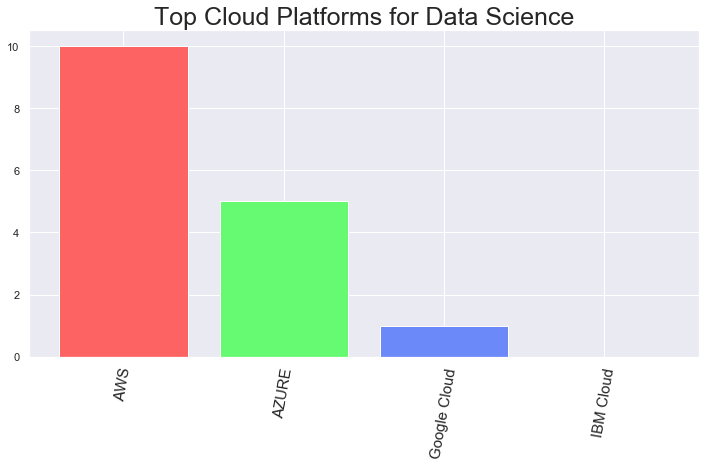

In [637]:
plt.figure(figsize=(12,6))
plt.bar(topcloud.keys(),topcloud.values(),color=["#FE6363","#66FA72","#6B89F9","c","y"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Top Cloud Platforms for Data Science",fontsize=25)
plt.show()

#### Observation:
 1. Not surprising on above chart, most companies uses AWS as thier cloud services followed by Azure and google cloud
 2. Surprisingly, there was on IBM cloud in our dataset

### Cloud Technologies

In [431]:
#lets first find the top Big Data for Data science in general
#spark hadoop hive hadoop mysql splunk kafka 

bigdata={}
bigdata['Spark']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('spark', regex=True)].sum()
bigdata['Hadoop']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('hadoop', regex=True)].sum()
bigdata['Hive']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('hive', regex=True)].sum()
bigdata['MySQL']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('mysql', regex=True)].sum()
bigdata['Splunk']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('splunk', regex=True)].sum()
bigdata['Kafka']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('kafka', regex=True)].sum()

topbigdata=dict(sorted(bigdata.items(), key=itemgetter(1),reverse=True))
topbigdata

{'Spark': 11, 'Hadoop': 8, 'Kafka': 5, 'Hive': 4, 'MySQL': 4, 'Splunk': 1}

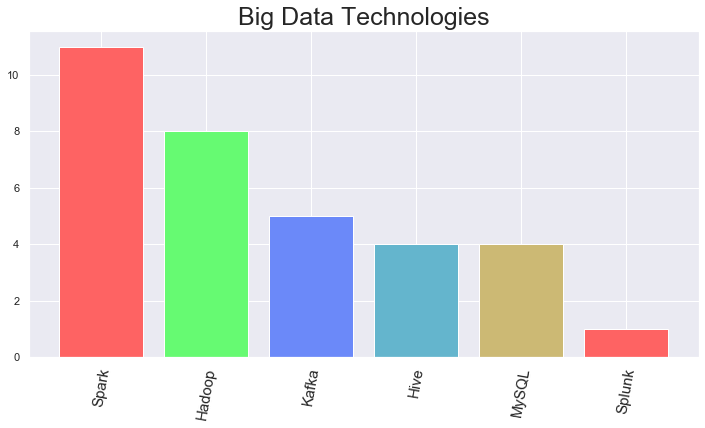

In [640]:
plt.figure(figsize=(12,6))
plt.bar(topbigdata.keys(),topbigdata.values(),color=["#FE6363","#66FA72","#6B89F9","c","y"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Big Data Technologies",fontsize=25)
plt.show()

#### Observation:
 1. Most companies are looking for individuals that has skills in Spark followed by Hadoop and Kafka
 2. We can also observe that Splunk was the lowerst skill set companies are looking to hire

### Data Visualization Tools

In [443]:
#lets first find the top Data visualization tools for Data science in general
#tableau power bi visio

viztool={}
viztool['Tableau']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('tableau', regex=True)].sum()
viztool['Power Bi']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('power', regex=True)].sum()
viztool['Visio']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('visio', regex=True)].sum()
bigdata['Excel']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('excel', regex=True)].sum()
bigdata['Plotly']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('plotly', regex=True)].sum()
bigdata['dash']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('dash', regex=True)].sum()

topviztool=dict(sorted(viztool.items(), key=itemgetter(1),reverse=True))
topviztool


{'Tableau': 16, 'Power Bi': 11, 'Visio': 2}

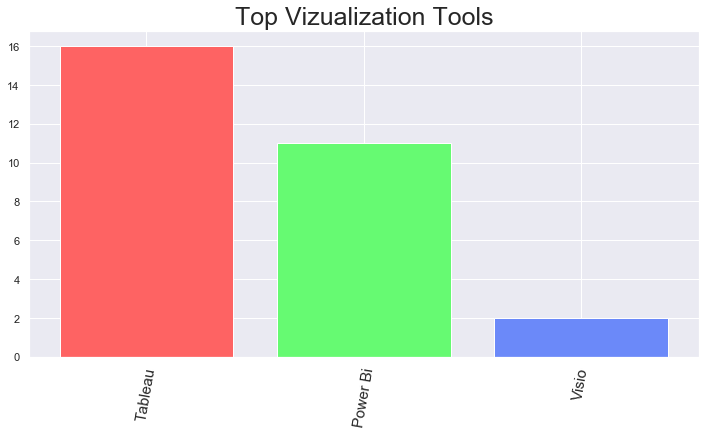

In [641]:
plt.figure(figsize=(12,6))
plt.bar(topviztool.keys(),topviztool.values(),color=["#FE6363","#66FA72","#6B89F9","c","y"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Top Vizualization Tools",fontsize=25)
plt.show()

#### Observation:
 1. Tableau is the highest data vizualiaztion tools companies are look for followed by Power BI and Visio

In [449]:
#check top python programming libraries like pandas, numpy, scipy, scikit-learn pyspark


pylang={}
pylang['Pandas']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('pandas', regex=True)].sum()
pylang['Numpy']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('numpy', regex=True)].sum()
pylang['Scipy']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('scipy', regex=True)].sum()
pylang['Scikit-Learn']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('scikit', regex=True)].sum()
pylang['Pyspark']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('pyspark', regex=True)].sum()

toppylang=dict(sorted(pylang.items(), key=itemgetter(1),reverse=True))
toppylang

{'Scikit-Learn': 7, 'Numpy': 5, 'Pandas': 3, 'Scipy': 3, 'Pyspark': 1}

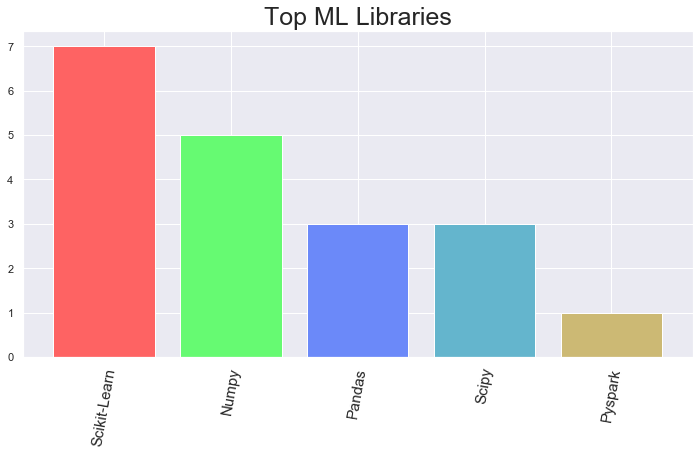

In [642]:
plt.figure(figsize=(12,6))
plt.bar(toppylang.keys(),toppylang.values(),color=["#FE6363","#66FA72","#6B89F9","c","y"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Top ML Libraries",fontsize=25)
plt.show()

#### Observation:
 1. Looking at the above chart, it make more sense that Scikit-Learn is the top ML libraries since our top skills showed that more companies are looking for people with machine learning skills
 2. We can see that Numpy and Pandas was the next top skills companies are looking for
 3. Lastly we can observe that Pyspark is the ML Library skills 

### Machine Learning Algorithms

In [457]:
#check types of machine learning algorithms 
#regression, trees, forest, knn, svm, clustering, series

algo={}
algo['Regression']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('regression', regex=True)].sum()
algo['Trees']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('trees', regex=True)].sum()
algo['Forests']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('forest', regex=True)].sum()
algo['Clustering']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('clustering', regex=True)].sum()
algo['Time Series']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('series', regex=True)].sum()
algo['SVM']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('svm', regex=True)].sum()
algo['KNN']=topskillscount["Count"][topskillscount['Top_Skills'].str.contains('knn', regex=True)].sum()


topalgo=dict(sorted(algo.items(), key=itemgetter(1),reverse=True))
topalgo


{'Regression': 3,
 'Trees': 3,
 'Clustering': 3,
 'Forests': 1,
 'Time Series': 1,
 'SVM': 1,
 'KNN': 0}

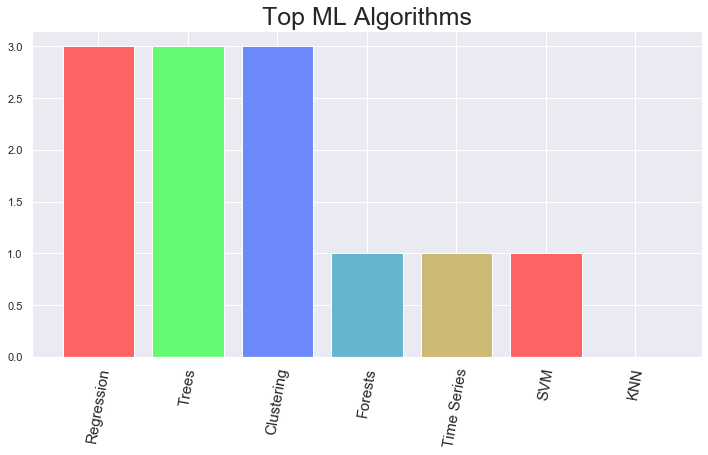

In [643]:
plt.figure(figsize=(12,6))
plt.bar(topalgo.keys(),topalgo.values(),color=["#FE6363","#66FA72","#6B89F9","c","y"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Top ML Algorithms",fontsize=25)
plt.show()

#### Observation:
 1. Regression, Tress and clustering are the top 3 skills companies are looking for followed by forest, time sereis and SVM
 2. We can observe that companies are not looking for KNN in our dataset

### Data Science Roles

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

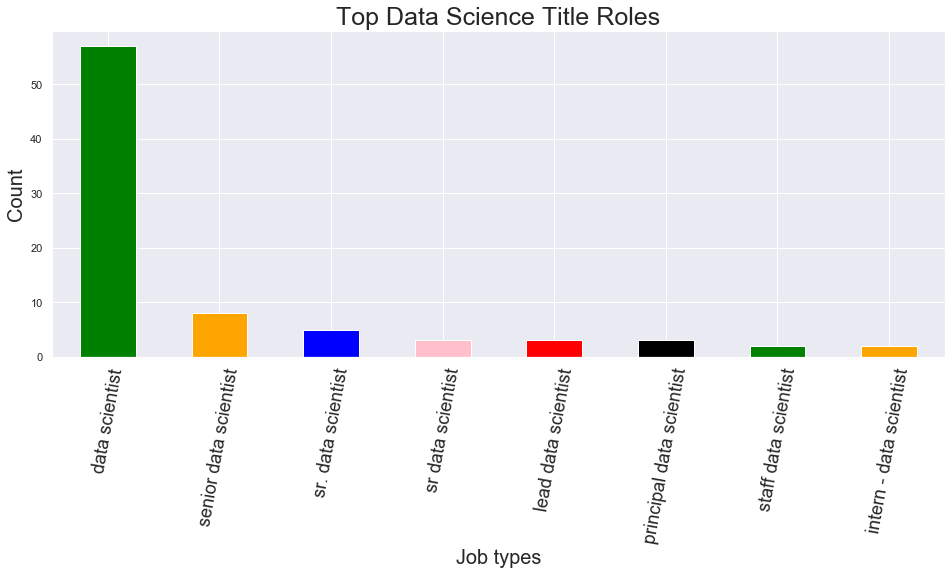

In [647]:
#lets first find the top data science roles

plt.figure(figsize=(16,6))
Toproles = df3['Job_Title'].value_counts()[:8].plot.bar(color=['green', 'orange', 'blue','pink','red','black'])

Toproles.set_xlabel("Job types",fontsize=20)
plt.title("Top Data Science Title Roles",fontsize=25)
Toproles.set_ylabel("Count",fontsize=20)
plt.xticks(rotation=80,fontsize=18)

#### Observation:
 1. From above chart, we can tell that most roles are titled as data scientist followed by Senior data scientist

### Top Hiring Companies

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

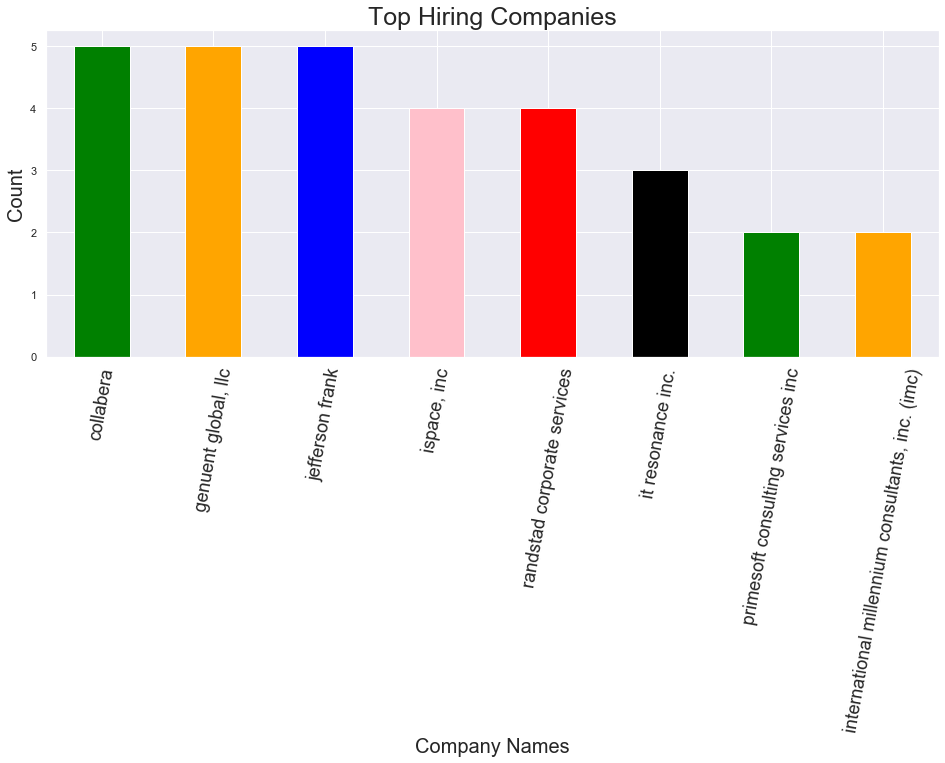

In [648]:
#Lets check the top 8 hiring companies

plt.figure(figsize=(16,6))
compname = df3['Company_Name'].value_counts()[:8].plot.bar(color=['green', 'orange', 'blue','pink','red','black'])

compname.set_xlabel("Company Names",fontsize=20)
plt.title("Top Hiring Companies",fontsize=25)
compname.set_ylabel("Count",fontsize=20)
plt.xticks(rotation=80,fontsize=18)


### lets looks at the companies in a pie chart based on percentage

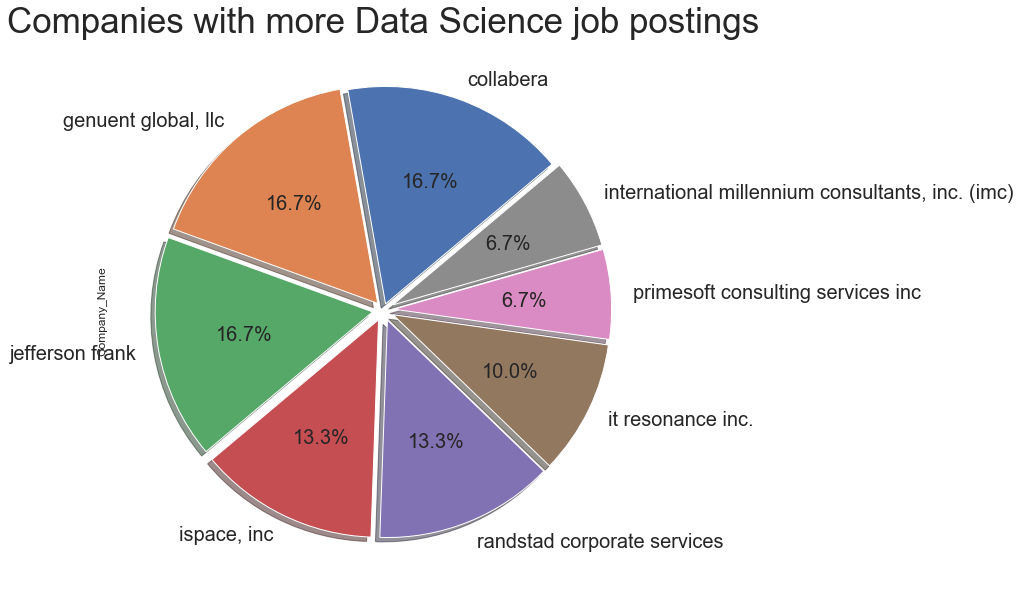

In [613]:
df3['Company_Name'].value_counts()[:8].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with more Data Science job postings",fontsize=35)
plt.show()

#### Observation:
 1. From the charts above, we can tell that Jefferson frank, genuent global and collabera are tired on the top spot for the most data science roles posted

### Top States

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

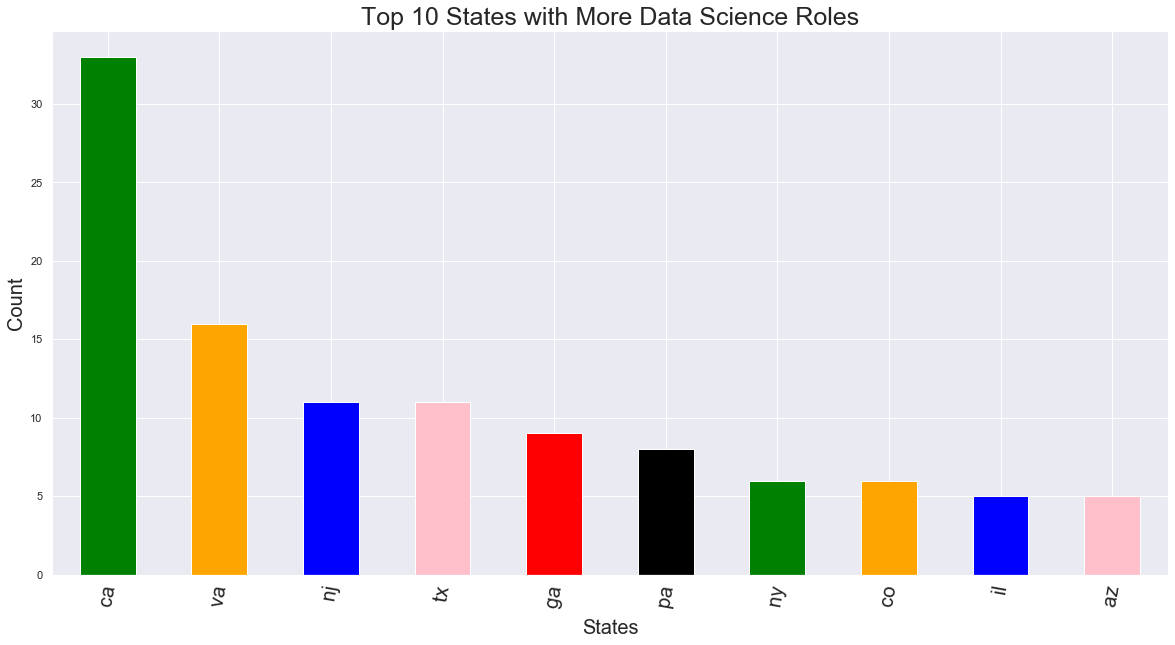

In [649]:
##lets first find the top states that offer data science roles
plt.figure(figsize=(20,10))
topstates = df3['State'].value_counts()[:10].plot.bar(color=['green', 'orange', 'blue','pink','red','black'])

topstates.set_xlabel("States",fontsize=20)
plt.title("Top 10 States with More Data Science Roles",fontsize=25)
topstates.set_ylabel("Count",fontsize=20)
plt.xticks(rotation=80,fontsize=20)


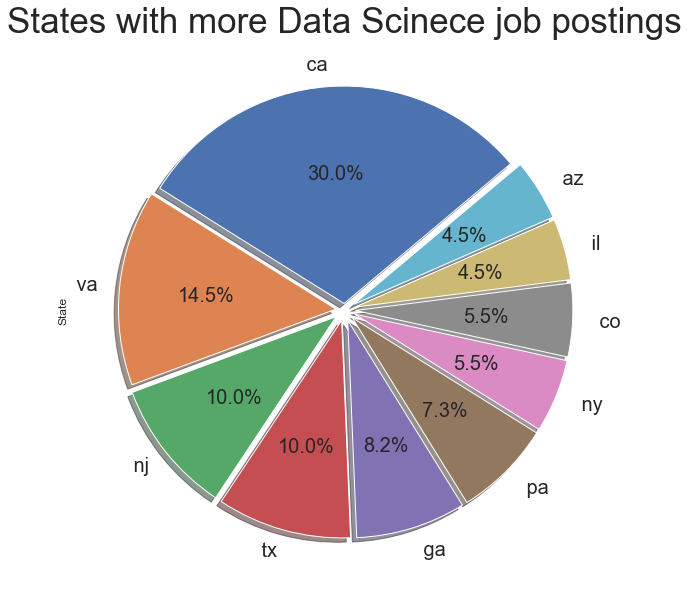

In [609]:
df3['State'].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("States with more Data Scinece job postings",fontsize=35)
plt.show()

#### Observation:
 1. From above charts, we can tell California has the most data scinece roles followed by Virginia and New Jersey

### Top Cities

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

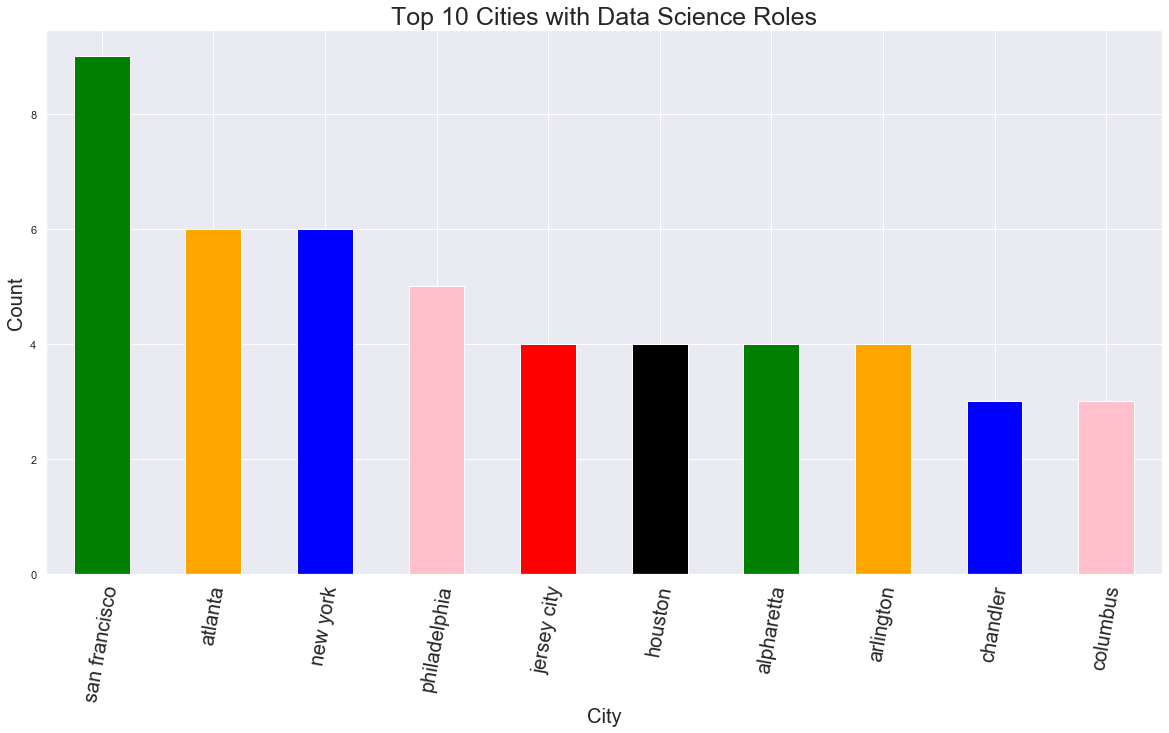

In [650]:
#lets first find the top cities that offer data science roles
plt.figure(figsize=(20,10))
topcities = df3['City'].value_counts()[:10].plot.bar(color=['green', 'orange', 'blue','pink','red','black'])

topcities.set_xlabel("City",fontsize=20)
plt.title("Top 10 Cities with Data Science Roles",fontsize=25)
topcities.set_ylabel("Count",fontsize=20)
plt.xticks(rotation=80,fontsize=20)


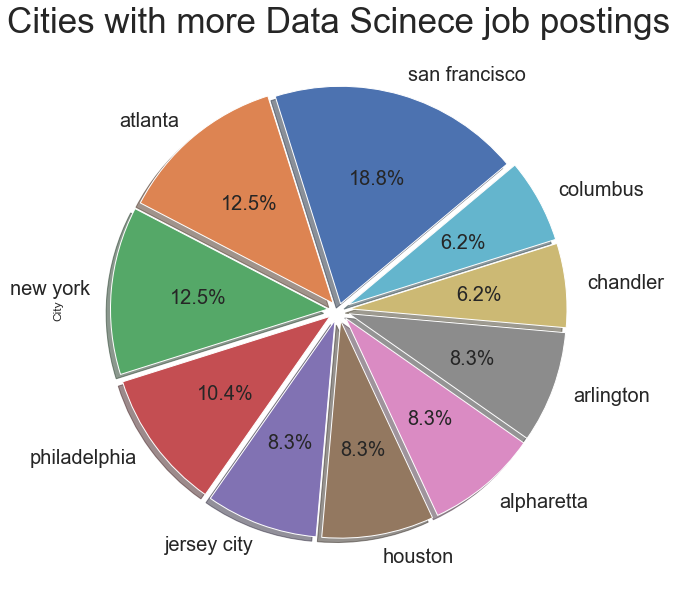

In [608]:
df3['City'].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Cities with more Data Scinece job postings",fontsize=35)
plt.show()

#### Observation:
 1. From above charts, we can tell San Francisco has the most data scinece roles followed by Atlanta and New York tired for second place

# Data Insight
 1. According to our Analysis, most companies are looking to hire full time data science roles followed by contract w2 and contract independent
 2. Machine learning, statistics and data analysis are the top skills companies are looking for
 3. Python is the top programming language companies are looking for followed by SQL and Java
 4. When it comes to deep learning framework, Tensorflow tops the chart followed by PyTorch and Keras
 5. Most companies uses AWS as thier cloud services followed by Azure and google cloud
 6. For Big data technologies, Spark is the highgest demand followed by Hadoop and Kafka
 7. In terms of data vizualiaztion tools Tableau, is the highest in demand followed by Power BI and Visio
 8. Top machine learning librareis are scikit-learn, pandas and numpy
 9. Regression, Tress and clustering are the top 3 machine learning algorithms in demand 
 10. According to our analysis we can identify that the top job role is titled as data scientist
 11. Jefferson Frank, Genuent Global and Collabera are the top 3 companies looking for data scientist with 16.7% each in our data
 12. By States, California has the most data scinece roles with 30% followed by Virginia 14.5% and New Jersey 10%
 13. By Cities, San Francisco with 18.8% has the most data scinece roles followed by Atlanta and New York tired for second place wtih 12.5%